In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#import data set
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print (y_train_raw)
print (y_train_raw[0])
print (y_train_raw[5999])
print (x_train_raw.shape, y_train_raw.shape)
print (x_test_raw.shape, y_test_raw.shape)
print (x_test_raw.shape, y_test_raw)


11490434/11490434 [==============================] - 0s 0us/step
[5 0 4 ... 5 6 8]
5
9
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) [7 2 1 ... 4 5 6]


In [17]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes) #MENGUBAH DESIMAL
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print (y_train [0]) #print representasi grup digit ke 0
print (y_train [5]) #print representasi grup digit ke 5
a = keras.utils.to_categorical([0,1,2,3,4,5,6,7,8,9], num_classes=10)
print (a)
print(y_train [5999])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


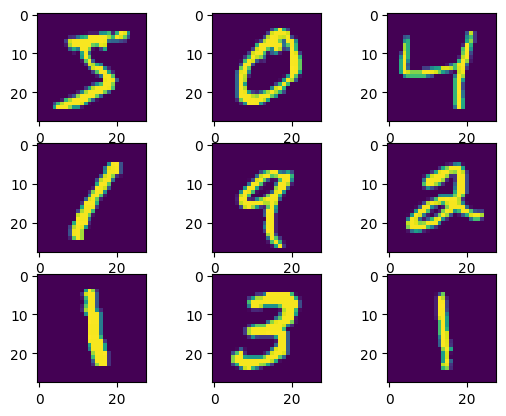

In [18]:
#visualisasi data
plt.figure()
for i in range (9) :
  plt.subplot(3,3, i+1)
  plt.imshow(x_train_raw[i])
  plt.axis('on')
plt.show()

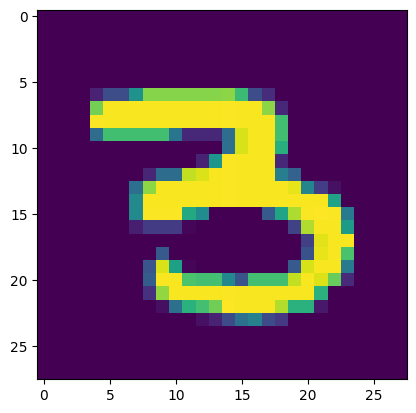

In [19]:
plt.imshow(x_test_raw[51])

In [20]:
#Data Preprocessing

#Convert28x28 into a vector => untuk masuk ke fully connected layers

x_train= x_train_raw.reshape (60000,784)
x_test = x_test_raw.reshape (10000,784)
x_train.shape
x_test.shape

(10000, 784)

In [21]:
#Data Normalization
#memastikan bahwa nilai pixel ada dalam range 0 dan 1

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train.dtype
print (x_test[7])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [22]:
print (x_test_raw[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  14 149 193   5   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  91 224 253 253  19   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28 235 254 253 253 166  1

In [23]:
#Build a model
#model sequential, one layer afer one layer, dense layer

mymodel = keras.Sequential (
    [ layers.Dense (512, activation='relu', input_dim = 784), #number of neuron 512, activation function =relu. input dimension 784
      layers.Dense (256, activation='relu'),
      layers.Dense (124, activation='relu'),
      #last layers : output layers
      layers.Dense (10, activation ='softmax') # we want to have 10 categories of class
    ]
)

mymodel.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 124)               31868     
                                                                 
 dense_7 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566366 (2.16 MB)
Trainable params: 566366 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
#compile the modul before run it with data
# specify : optimizer, learning rate

myoptimizer = tf.keras.optimizers.Adam(0.001) #optimizer : Adam, learning rate = 0.001
mymodel.compile(loss=keras.losses.categorical_crossentropy,   #calculate losses with categorical crossentropy
              optimizer=myoptimizer,
              metrics=['accuracy'])


In [26]:
#Evaluate The Model with test data
#at the end please compare the result with training data

myscore = mymodel.evaluate(x_test,  y_test, verbose=1)
#print(myscore)
#print('test loss :', myscore[0])
#print('test accuracy :', myscore[0])

313/313 [==============================] - 1s 3ms/step - loss: 2.3090 - accuracy: 0.1163


In [28]:
#Building CNN

#1. Import library and tools
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.Sequential()

In [29]:
#2.Building Model

#build convolutional layer by using "keras.layers.Conv2D"
#specify kernel size (filter) : 5x5
#specify stride (1,1) : the scanning moving 1 by 1 pixel
#Padding is a term relevant to convolutional neural networks
#as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN
#specify padding : "same" keep the original as input, "valid" : reduced to the size or kernel
#specify activation function : relu
#input shape = 28x28x1 => 1 channel, if using RGB use 3 channel

#1st convolutional and pooling layers
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),            #1st conv layers
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))

model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))  #1st pooling layers

##Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add a dropout layer to reduce overfitting.
#0.25 is the dropout rate.
#if you want to keep 75% of your nodes in your network, then your rate = 1-0.75 =0.25
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

##Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

In [30]:
#3.Expand data Dimension

X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
X_test.shape


(10000, 28, 28, 1)

In [31]:
#4.Model Compilation

model.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])


In [32]:
#5.Model Training

model.fit(x=X_train,y=y_train,epochs=2,batch_size=128)

Epoch 1/2
469/469 [==============================] - 73s 153ms/step - loss: 0.2820 - accuracy: 0.9136
Epoch 2/2
469/469 [==============================] - 66s 141ms/step - loss: 0.0936 - accuracy: 0.9729


In [33]:
#6. Evaluate CNN model
test_loss, test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("Test Accuracy %.2f"%test_acc)

79/79 [==============================] - 4s 42ms/step - loss: 0.0365 - accuracy: 0.9872
Test Accuracy 0.99


In [34]:
#7. Save the model on your drive

model.save(r'C:\Users\user\python_course\final_DNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
#8. load the Model
from tensorflow.keras.models import load_model
new_model=load_model(r'C:\Users\user\python_course\final_DNN_model.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

1/1 [==============================] - 0s 131ms/step
prediction results of the first 25 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
9,6,6,5,4,	
first 25 images in the test set:


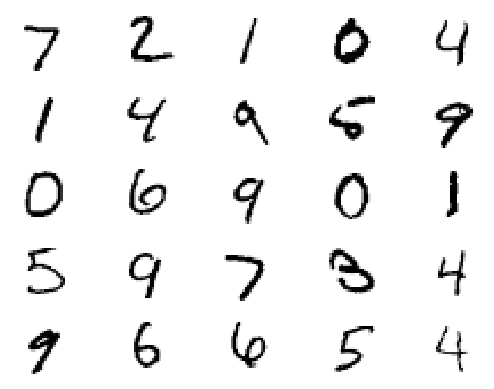

In [36]:
#9. Visualization
import matplotlib.pyplot as plt
%matplotlib inline

def res_Visual(n):
    #final_opt_a=new_model.predict_classes(X_test[0:n])
    predictions = new_model.predict(X_test[0:n])
    final_opt_a = np.argmax(predictions, axis=1) # Get the class with highest probability
    #Perform predictions on the test set by using the model.
    #nrow=n number of row, ncols= number of columns that you want to plot your data into.
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('prediction results of the first {} images:'.format(n))

    #create a "for loop"
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')

        #Visualize image display.
        img= X_test[i].reshape((28,28))#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualization
        ax[i].axis("off")
    print('first {} images in the test set:'.format(n))
res_Visual(25)